# 4주차 회귀분석 연습문제 4.8 R 풀이
> 

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김동준
- categories : [R, 회귀분석]

base

In [12]:
A <- c(5,6,7,8,9,10,11,12,13,14)
B <- c(89,87,98,110,103,114,116,110,126,130)

# 1)2) 절편과 기울기의 신뢰구간 및 검정

In [13]:
lm48 <- lm(B~A)
summary(lm48)


Call:
lm(formula = B ~ A)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3758 -2.1545  0.9152  2.0864  8.3455 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   66.212      5.767  11.482 3.00e-06 ***
A              4.430      0.581   7.625 6.16e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.278 on 8 degrees of freedom
Multiple R-squared:  0.879,	Adjusted R-squared:  0.8639 
F-statistic: 58.14 on 1 and 8 DF,  p-value: 6.161e-05


In [14]:
coeffs <- coefficients(lm48)
confint(lm48,level = 0.95) # 기울기와 절편의 95% 신뢰구간 

,2.5 %,97.5 %
(Intercept),52.914087,79.510156
A,3.090412,5.770194


	R을 통해 y=β_0+β_1 x+ϵ 를 가정해 본 결과
    절편β_0은 66.212, 기울기β_1은 4.430이 나왔다.
    절편의 신뢰구간을 추정해본 결과
    절편    β_0의 신뢰구간은 (52.914087, 79.510156) 으로 나왔다.

	이어서 자유도가 8인 t분포에서 가운데 면적이 95% 인 경우의 t*값은 2.306이다.
    그런데 summary 에서 확인할 수 있는 절편의 t-value은 11.482로 2.306보다 크다.
    
    즉 영가설을 기각한다.


>	기울기의 신뢰구간은 (3.090412, 5.770194)이다.
>	summary에서 절편에 대한 t-value 값은 7.625인데 이 값은 자유도 8인 t분포에서 가운데 면적이 95%일때의 t*값인 2.306 보다 크므로 영가설을 기각한다.

# 3) 분산분석표로 기울기 검정

In [15]:
anova(lm48)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
A,1,1619.2758,1619.27576,58.13643,6.160731e-05
Residuals,8,222.8242,27.85303,NA,NA


>	F-value는 58.136 이다. 분자의 자유도 1 과 분모의 자유도가 8인 F-분포에서 
    p-value 는 6.161^(-10)이다.
    이 p값은 굉장히 작기 때문에 선형모형(기울기와 편차)의 가정이 좋은 가정이라고 말할 수 있다. 


# 4) 결정계수와 의미

In [16]:
(cor(A,B))^2

[1] 0.8790379

    결정계수 R^2는 0.8790379이다. 1에 가까운 값으로 추정된 방정식이 판매액과 광고비를 잘 나타내 준다고 말할 수 있다

# 5) x=10 일때 yhat 신뢰구간

In [20]:
q10 <- data.frame(A=10)
predict(lm48,q10,level=0.95,interval="confidence")

,fit,lwr,upr
1,110.5152,106.6087,114.4216


>	적합된 광고비 값은 110.5152이고, 그 신뢰구간은 (106.6087,114.4216) 이다.

# 6) x=10 일때 y 예측구간

In [21]:
predict(lm48,q10,level=0.95,interval="predict")

,fit,lwr,upr
1,110.5152,97.73341,123.2969


>	적합된 광고비 값은 110.5152이고, 그 예측구간은 (97.73341,123.2969) 이다.

In [22]:
q8 <- data.frame(A=8)
q9 <- data.frame(A=9)
q10 <- data.frame(A=10)
q11 <- data.frame(A=11)
q12 <- data.frame(A=12)
predict(lm48,q8,level=0.95,interval="confidence")
predict(lm48,q9,level=0.95,interval="confidence")
predict(lm48,q10,level=0.95,interval="confidence")
predict(lm48,q11,level=0.95,interval="confidence")
predict(lm48,q12,level=0.95,interval="confidence")

predict(lm48,q8,level=0.95,interval="predict")
predict(lm48,q9,level=0.95,interval="predict")
predict(lm48,q10,level=0.95,interval="predict")
predict(lm48,q11,level=0.95,interval="predict")
predict(lm48,q12,level=0.95,interval="predict")

,fit,lwr,upr
1,101.6545,97.3128,105.9963


,fit,lwr,upr
1,106.0848,102.1784,109.9913


,fit,lwr,upr
1,110.5152,106.6087,114.4216


,fit,lwr,upr
1,114.9455,110.6037,119.2872


,fit,lwr,upr
1,119.3758,114.2736,124.4779


,fit,lwr,upr
1,101.6545,88.73311,114.576


,fit,lwr,upr
1,106.0848,93.30311,118.8666


,fit,lwr,upr
1,110.5152,97.73341,123.2969


,fit,lwr,upr
1,114.9455,102.024,127.8669


,fit,lwr,upr
1,119.3758,106.1794,132.5721


## 신뢰대 예측대 도시

Warning message in predict.lm(lm48, level = 0.95, interval = "predict"):
“predictions on current data refer to _future_ responses
”


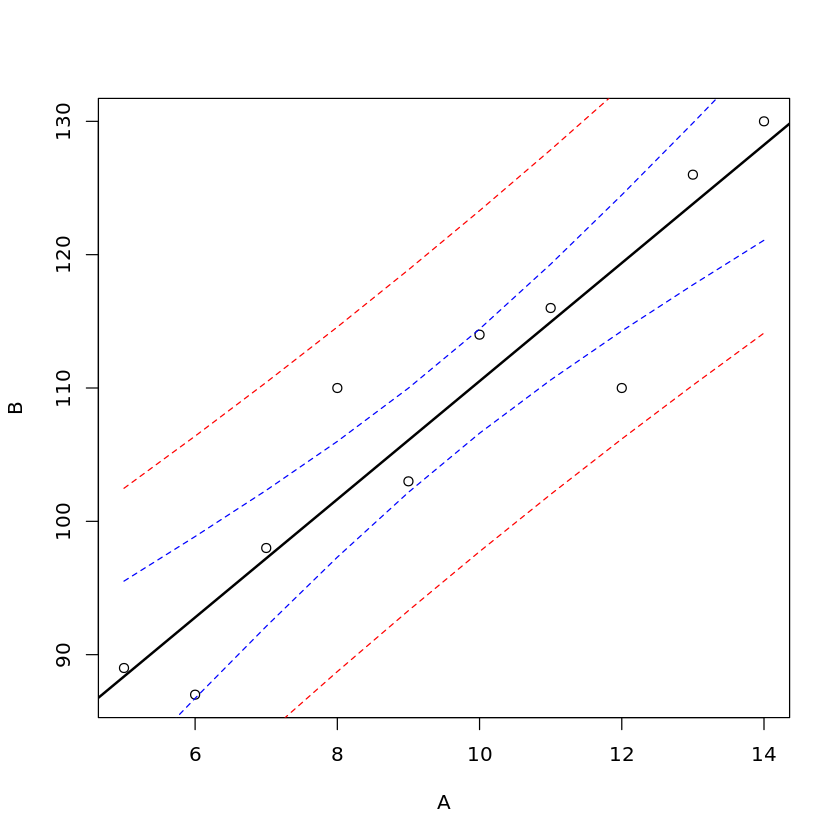

In [23]:
m_conf <- predict(lm48,level=0.95,interval="confidence")

plot(B~A)
lwr <- m_conf[,2]
upr <- m_conf[,3]
sx <- sort(A, index.return=TRUE)
abline(coef(lm48),lwd=2)
lines(sx$x, lwr[sx$ix], col="blue", lty=2)
lines(sx$x, upr[sx$ix], col="blue", lty=2)

m_pred <- predict(lm48,level=0.95,interval="predict")
p_lwr <- m_pred[,2]
p_upr <- m_pred[,3]
lines(A, p_lwr, col="red", lty=2)
lines(A, p_upr, col="red", lty=2)

(오류는 무슨뜻일까.. 문제는 없어보인다)

>	붉은선은 예측대, 파란선은 신뢰대이다. 예측대가 신뢰대보다 더 넓은 범위를 차지하며

>	신뢰대와 예측대 모두 거의 중앙에 회귀선을 품고있는 모습을 하고 있다.

	값에따른 신뢰구간과 예측구간

|x_0|신뢰구간(confidence)||예측구간(predict)||
|:---:|:---:|:---|:---|:---|
| |lwr|upr|lwr|Upr|
|8|97.31280|105.9963|88.73311|114.5760|
|9|102.1784|109.9913|93.30311|118.8666|
|10|106.6087|114.4216|97.73341|123.2969|
|11|110.6037|119.2872|102.0240|127.8669|
|12|114.2736|124.4779|106.1794|132.5721|

